Привет, меня зовут Дмитрий Акимов и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев. 
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее». 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Привет Дмитрий, приятно познакомиться! </div>

# Определение возраста покупателей

**Описание проекта**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
Контролировать добросовестность кассиров при продаже алкоголя.
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

**Инструкция по выполнению проекта**

- Проведите исследовательский анализ набора фотографий.
- Подготовьте данные к обучению.
- Обучите нейронную сеть и рассчитайте её качество.

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера v1</b>
    
⚠️ Понимаю, что это довольно специфичный проект, но основную информацию по нему лучше написать.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> готово)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>

✔️ Отлично)
</div>

## Исследовательский анализ данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='training',
    seed=123456)

test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='validation',
    seed=123456)

Found 5694 validated image filenames.
Found 1897 validated image filenames.


<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Хорошо, таблица загружена и ты правильно инициализировал ImageDataGenerator.

Можно разбить загрузку данных и инициализацию объекта на две разных ячейки, юпитер позволяет атомарно выполнять ячейки кода и этим лучше пользоваться)
</div>
<div class="alert alert-block alert-danger">
   
❌ Для анализа исходных данных нам необходимо взять фотографии без аугментации, иначе мы будем изучать искаженные изображения.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> да, логично, я об этом не подумал
</div>

In [3]:
labels.shape

(7591, 2)

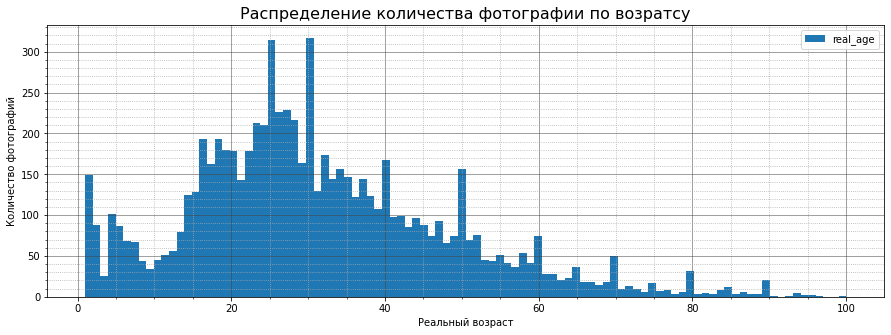

In [4]:
labels.plot(kind='hist', bins=100,
label='реальный возраст', figsize=(15, 5))
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 0.5)
plt.grid(which='minor', color='#aaa', ls=':')
plt.xlabel('Реальный возраст')
plt.ylabel('Количество фотографий')
plt.title('Распределение количества фотографии по возратсу', fontsize=16);

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Хороший график, молодец, что задал bins равным количеству уникальных значений в признаке, так ты сможешь оценить распределение каждого года.
</div>
<div class="alert alert-block alert-warning">

⚠️ Не забывай подписывать графики. 

</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> сделано)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>

✔️ Очень хорошо, теперь график выглядит очень презентабельно.
</div>

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [6]:
features, target = next(train_generator)

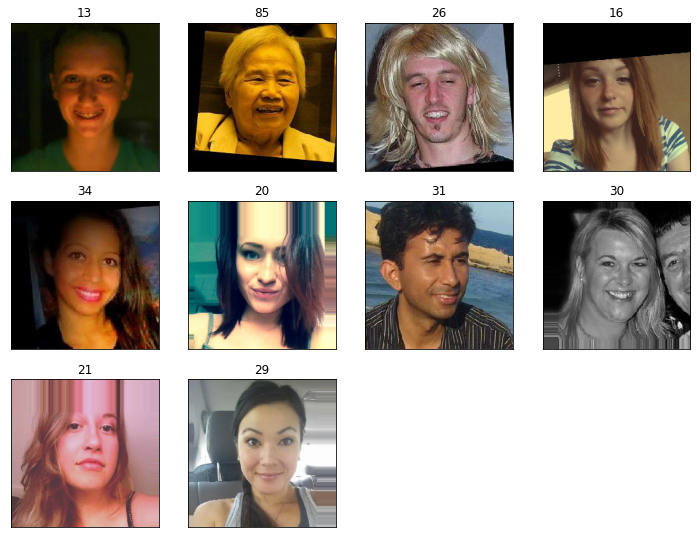

In [7]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title(target[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Датасет обладает 7591 фотографиями. Небольшая выборка для оценки возраста.

Больше всего фотографий в диапазоне от 20 до 41 года. Также в выборке присутствуют дети и старики.

С учетом вложенных фотографий модели будет непросто оценивать возраст. На фотографиях присутствуют объекты, которые закрывают лицо, некоторые фотографии имеют низкое качество, а так же есть фотографии на которых изначально прменена некоторая аугментация.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отлично, примеры фотографий выведены.
    
Хороший вывод, ты отметил основные особенности изображений и распределения таргета. 
    
Несколько советов по выводу:
- В этом поекте у тебя не так много действий и выводы не теряются, но если анализ данных станет больше, то лучше писать промежуточные выводы после каждого исследования, потом из этих выводов будет сформирован итоговый вывод по разделу;
- Вывод должен быть полезен тебе, поэтому кроме общей информации о датасете необходимо описывать и твои идеи по тому, как это может быть использовано в твоем проекте.
    
Обрати внимание на аномалии на гистограмме распределения таргета, как ты думаешь, как могли появиться такие 'всплески'?
    
</div>
<div class="alert alert-block alert-danger">
   
❌ Может ли мы считать разметку корректной? Подпиши возраст для каждой фотографии.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> подписал)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>

✔️ Отлично, можем отметить, что разметка выглядит корректно.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255, vertical_flip=True, horizontal_flip=True, width_shift_range=0.2, height_shift_range=0.2)
    train_data = train_datagen.flow_from_dataframe(
      dataframe=labels,
      directory= path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='training',
      seed=12345)
    return train_data

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_data = test_datagen.flow_from_dataframe(
      dataframe=labels,
      directory= path + 'final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='validation',
      seed=12345)
    return test_data

def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet', 
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data) 
    model.fit(train_data,
              validation_data=test_data,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              batch_size=batch_size, epochs=epochs,
              verbose=2, shuffle=True)

    return model

```

```

Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 116s - loss: 250.5452 - mae: 11.7052 - val_loss: 653.0323 - val_mae: 20.5817
Epoch 2/10
178/178 - 89s - loss: 119.6466 - mae: 8.2766 - val_loss: 675.3818 - val_mae: 20.9946
Epoch 3/10
178/178 - 89s - loss: 94.7456 - mae: 7.3895 - val_loss: 292.6572 - val_mae: 13.2052
Epoch 4/10
178/178 - 89s - loss: 84.9305 - mae: 7.0502 - val_loss: 126.7670 - val_mae: 8.4798
Epoch 5/10
178/178 - 89s - loss: 73.6542 - mae: 6.5156 - val_loss: 122.7660 - val_mae: 8.5411
Epoch 6/10
178/178 - 89s - loss: 66.5148 - mae: 6.1975 - val_loss: 138.1207 - val_mae: 9.0090
Epoch 7/10
178/178 - 89s - loss: 59.8596 - mae: 5.9495 - val_loss: 86.7732 - val_mae: 6.8748
Epoch 8/10
178/178 - 89s - loss: 55.3110 - mae: 5.6656 - val_loss: 83.7298 - val_mae: 6.8386
Epoch 9/10
178/178 - 89s - loss: 49.5307 - mae: 5.3559 - val_loss: 80.9372 - val_mae: 6.6142
Epoch 10/10
178/178 - 88s - loss: 46.1872 - mae: 5.2094 - val_loss: 89.2906 - val_mae: 6.9945

60/60 - 9s - loss: 89.2906 - mae: 6.9945
Test MAE: 6.9945

```

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отлично, модель построена и показывает требуемую точность. Ты правильно использовал Horizontal_flip - зеркальное отражение выглядит более естественным для наших данных, а вот vertical_flip перевернет фотографии вверх ногами, что не очень подходит для фотографий лиц. 
</div>

Модель сверточной нейронной сети построена на ResNet50.

За 10 эпох обучения удалось уменьшить MAE с 11.7 до 5.2 на тренировочной выборке. Дальнейшее обучение возможно улучшит результат.

## Анализ обученной модели

Мы обучили остаточную нейронную сеть (ResNet) с аугментацией (горизонтальный поворот). Цель была достичь значения средней абсолютной ошибки MAE на тестовой выборке не больше 8. Обучив модель на 10 эпохах мы достигли значение метрики MAE 6.99, а функции потерь 89.2. Модель не переобучилась, поскольку последовательно метрика и на обучающей выборке, и на тестовой улучшалась (если бы на на обучающей продолжила улучшаться, а на тестовой нет, тогда бы модель переобучилась) поэтому модель можно использовать для определения возраста покупателей. Однако учитывая, что погрешность 7 лет может быть значимой для определения возраста например при покупке алкоголя, необходимо более точно определить цель задачи, если основная задача разделить покупателей на категории, то можно сказать что модель удовлетворительно справляется с задачей, однако, если цель задачи определять точный возраст покупателей, то модель требует дальнейшей доработки.

<div class="alert alert-block alert-success">
    <b>Комментарий от ревьюера v1</b>
    
# Общий вывод
    
✔️ Ты полностью справился со всеми техническими сложностями и построил модель, которая добилась требуемого качества. Согласен с твоей оценкой предсказательной способности модели, но тут ещё нужно смотреть на ошибку предсказаний для конкретных возрастов.  Большая ошибка может быть обусловлена слабой предсказательной способностью для больших возрастов.
</div>
<div class="alert alert-block alert-danger">

❌ Добавь возраст для каждой отображенной фотографии и выведи фотографии без аугментации.
</div>

Если есть вопросы, то задавай, удачи!)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> спасибо за комментарии, все поправил)
</div>

<div class="alert alert-block alert-success">
    <b>Комментарий от ревьюера v2</b>
    
# Общий вывод
    
✔️ Спасибо за доработки, теперь все верно. 
    
Я забыл обратить внимание, что ты не пользуешься методами info и head при изучении таблицы - это моя ошибка) После загрузки данных необходимо проверить общую информацию по таблице с помощью info, так мы оценим количество признаков, их тип и наличие пропусков, помимо этого метод head() позволит получить первые 5 строк, так мы оценим правильность загрузки данных. Не забывай про это.
    
Проект принимается, успехов в дальнейшем обучении!)
</div>


## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы